In [1]:
from IPython.display import HTML

HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>
''')

# Problem 2.7
Givet är att

| - | 1976 | 1984 |
|-----|------|------|
| max | 3.6  | 4.2  |
| min | 3.5  | 4.1  |

där alla siffor är i miljarder personer. Vidare kan vi anta att befolkningsutvecklingen är expoential, det ger ansatsen

$y = ae^{bx}$

Genom att logartimera får vi

$ln(y) = ln(a) + b x ln(e)$

Om vi ansätter $Y = ln(y)$ får vi att

$Y = C + bx = f(x)$


Text(0,0.5,'ln(antal manniskor)')

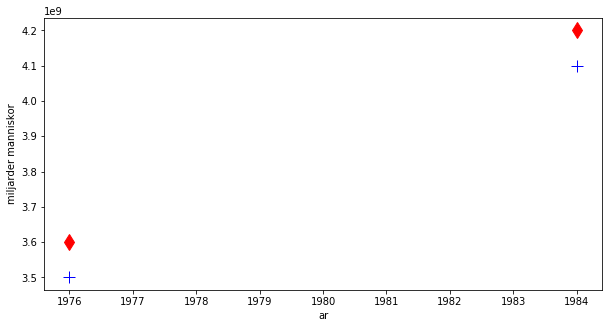

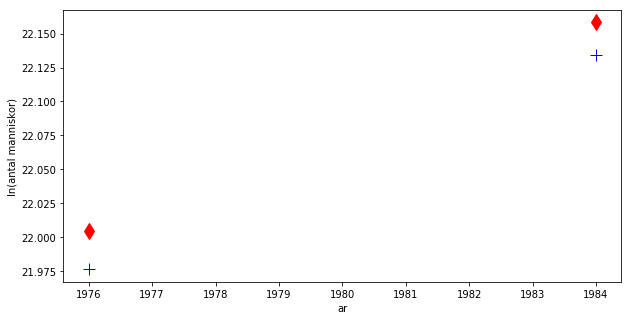

In [18]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (10,5)

y_max = np.array([3.6, 4.2]) * 10**9
y_min = np.array([3.5, 4.1]) * 10**9
x = [1976, 1984]

plt.figure()
plt.plot(x, y_max, 'rd', markersize=12)
plt.plot(x, y_min, 'b+', markersize=12)
plt.xlabel('ar')
plt.ylabel('miljarder manniskor')

plt.figure()
plt.plot(x, np.log(y_max), 'rd', markersize=12)
plt.plot(x, np.log(y_min), 'b+', markersize=12)
plt.xlabel('ar')
plt.ylabel('ln(antal manniskor)')

Vi skall bestämma den maximala och minimala befolningsmängden baserat på detta data. Minimal befolkning fås då den minsta tillväxten i intervallet har skett dvs $y=3.6$ och $y=4.1$. Analogt fås maximal då tillväxten är störst, dvs då $y=3.5$ och $y=4.2$.

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
plt.rcParams["figure.figsize"] = (10,5)

y_max = np.array([3.5, 4.2]) * 10**9
y_min = np.array([3.6, 4.1]) * 10**9
x_plot = np.array([1976, 1984])
x = np.array([0, 8]) # Så att anpassningen slutar vid 1976 och inte 0
lutning_max, konst_max, _, _, _ = stats.linregress(x, np.log(y_max))
lutning_min, konst_min, _, _, _ = stats.linregress(x, np.log(y_min))

print "Max lutning b_max: {}, max konstant {}".format(lutning_max, konst_max)
print "Min lutning b_min: {}, min konstant {}".format(lutning_min, konst_min)
plt.figure()
plt.plot(x_plot, np.log(y_max), 'rd', markersize=12)
plt.plot(x_plot, np.log(y_min), 'bs', markersize=12)
plt.plot(x_plot, lutning_max * x + konst_max)
plt.plot(x_plot, lutning_min * x + konst_min)
plt.xlabel('ar')
plt.ylabel('ln(antal manniskor)')

print "Max antal människor: {}".format(np.exp(konst_max+lutning_max*(2019-1976))/10**9)
print "Min antal människor: {}".format(np.exp(konst_min+lutning_min*(2019-1976))/10**9)

Max lutning b_max: 0.0227901945992, max konstant 21.9760288054
Min lutning b_min: 0.016256641031, min konstant 22.0041996824
Max antal människor: 9.32539511546
Min antal människor: 7.24252143157


Från grafen kan vi läsa ut att maximal befolkningsökning fås då lutningen $b_{max} = 0.023$ och $a_{max}=e^{21.98}$. Minimala befolkningsökningen fås då $b_{min} = 0.016$ och $a_{min}=e^{22.00}$.

$y_{max} = e^{21.98} e^{0.023x} = e^{21.98+0.023x}$

$y_{min} = e^{22.00} e^{0.016x} = e^{22.00+0.016x}$

Högsta möjliga befolkningsmängd blir då

$y_{max}(2019) = e^{22.00+0.023(2019-1976)} = 9.3 \cdot 10^9$

Minsta möjliga befolkningsmänd blir

$y_{min}(2019) = e^{22.00+0.016(2019-1976)} = 7.2 \cdot 10^9$

Tidigaste respektive sista året det kan ha varit 6 miljarder människor

$6\cdot10^9 = e^{21.98+0.023(x-1976)} \rightarrow x = 1999$ 

$6\cdot10^9 = e^{22.00+0.016(x-1976)} \rightarrow x = 2008$

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
plt.rcParams["figure.figsize"] = (10,5)

y_max = np.array([3.5, 4.2]) * 10**9
y_min = np.array([3.6, 4.1]) * 10**9
x_plot = np.linspace(0, 100, 50)
x = np.array([0, 8]) # Så att anpassningen slutar vid 1976 och inte 0

lutning_max, konst_max, _, _, _ = stats.linregress(x, np.log(y_max))
lutning_min, konst_min, _, _, _ = stats.linregress(x, np.log(y_min))


plt.figure()
plt.plot(x_plot + 1976, np.exp(konst_max+lutning_max*x_plot), 'b')
plt.plot(x_plot+1976, np.exp(konst_min +lutning_min*x_plot), 'r')
plt.plot(x_plot+1976, np.ones(50)*6*10**9)